In [73]:
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import datetime
import hvplot
import hvplot.pandas
import holoviews as hv
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from MCForecastTools import MCSimulation
import random
#hv.extention('bokeh', logo=False)

In [74]:
def simulate_weights(no_of_assets, no_of_trials):
    numOfAssets=no_of_assets
    trials = no_of_trials
    overall_weights=[]
    total = 0
    for i in range(trials):
        weights=[]
        for i in range(numOfAssets):
            weights.append(random.random())
        total = sum(weights)
        for i in range(len(weights)):
            weights[i]=round(weights[i]/total,2)
        overall_weights.append(weights)
    #return weights list
    return(overall_weights)
print(simulate_weights(2,2))

[[0.0, 1.0], [0.4, 0.6]]


In [75]:
simulation_count = 2
no_of_assets = 2
mc_weights = simulate_weights(no_of_assets,simulation_count)

In [76]:
print(mc_weights)

[[0.89, 0.11], [0.79, 0.21]]


In [77]:
# Fetch Stock Metrics
#def fetch_stock_data(tickers, start_date, end_date):
def fetch_stock_data():
    #hardcoded variables to be replaced
    tickers = ['MSFT','AAPL','AMZN','NKE','TSLA','GOOG','AMD','NVDA','BAC','JPM']
    start_date = datetime.date(2013,1,1)
    end_date = datetime.date(2023,2,1)

    #Function
    alpaca_api_key = 'PKURMS5ELMEHV4ZGBXTQ'
    alpaca_secret_key = 'NhYNWSU4szskB7qUMl2FXPqYoQZXwL50ahf54jds'
    timeframe = '1D'
    alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")
    # Get current price data for tickers
    alpaca_df = alpaca.get_bars(
        tickers,
        timeframe,
        start = start_date,
        end = end_date
    ).df
    #Drop time from the index
    alpaca_df.index = alpaca_df.index.date
    #Rename the index to date
    alpaca_df.index.name = 'date'
    #Reorder the columns so that the order of columns is date, ticker, open, high, low, close, volume.
    alpaca_df = alpaca_df[['symbol', 'open', 'high', 'low', 'close', 'volume']]
    #calculate the daily returns
    alpaca_df['daily_return'] = alpaca_df['close'].pct_change()
    #calculate volatility annualized to a 252 day trading year
    alpaca_df['volatility'] = alpaca_df['daily_return'].rolling(window=10).std() * (252**0.5)
    alpaca_df['30_ma'] = alpaca_df['close'].rolling(30).mean()
    return(alpaca_df)


In [78]:
full_tickers = ['MSFT','AAPL','AMZN','NKE','TSLA','GOOG','AMD','NVDA','BAC','JPM']
stock_1 = full_tickers[0]
stock_2 = full_tickers[1]
start_date = datetime.date(2023,1,1)
end_date = datetime.date(2023,2,1)
investment_amount = 200000
investment_horizon = 2

In [81]:
alpaca_df=fetch_stock_data()
alpaca_df.head()

,symbol,open,high,low,close,volume,daily_return,volatility,30_ma
date,,,,,,,,,
2016-01-04,AAPL,102.61,105.368,102.00,105.35,71935339,NaN,NaN,NaN
2016-01-05,AAPL,105.75,105.850,102.41,102.71,58690536,-0.025059,NaN,NaN
2016-01-06,AAPL,100.56,102.370,99.87,100.70,71079827,-0.019570,NaN,NaN
2016-01-07,AAPL,98.68,100.130,96.43,96.45,85996453,-0.042205,NaN,NaN
2016-01-08,AAPL,98.55,99.110,96.76,96.96,75066292,0.005288,NaN,NaN


In [82]:
df_ticker = alpaca_df
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)
df_ticker = pd.concat([MSFT, KO], axis=1, keys=["MSFT", "KO"])
df_ticker.head() 

MSFT                                                           \
             open     high    low  close    volume daily_return volatility   
date                                                                         
2016-01-04  54.32  54.8000  53.39  54.80  59379610    -0.607422   3.070814   
2016-01-05  54.93  55.3900  54.54  55.05  36457804     0.004562   3.071981   
2016-01-06  54.32  54.4001  53.64  54.05  41899187    -0.018165   3.053842   
2016-01-07  52.70  53.4850  52.07  52.17  61897908    -0.034783   3.034095   
2016-01-08  52.37  53.2800  52.15  52.33  52260304     0.003067   3.032969   

                         KO                                                \
                 30_ma open high low close volume daily_return volatility   
date                                                                        
2016-01-04  133.834000  NaN  NaN NaN   NaN    NaN          NaN        NaN   
2016-01-05  131.312667  NaN  NaN NaN   NaN    NaN          NaN        NaN   
2016-01-06  128.709000  NaN  NaN NaN   NaN    NaN          NaN        NaN   
2016-01-07  126.092667  NaN  NaN NaN   NaN    NaN          NaN        NaN   
2016-01-08  123.461000  NaN  NaN NaN   NaN    NaN          NaN        NaN   

                  
           30_ma  
date              
2016-01-04   NaN  
2016-01-05   NaN  
2016-01-06   NaN  
2016-01-07   NaN  
2016-01-08   NaN

In [93]:
portfolio_stocks = alpaca_df.groupby('symbol')['close'].mean()

TypeError: 'numpy.ndarray' object is not callable

In [92]:
portfolio_stocks.head()

symbol
AAPL     172.233086
AMD       46.381739
AMZN    1754.463745
BAC       29.106862
GOOG    1321.978808
JPM      110.671626
MSFT     157.645211
NKE       92.612900
NVDA     232.791183
TSLA     470.025426
Name: close, dtype: float64


In [27]:
metric1 = stock_df['close'].min()
#metric 2 is the highest close price
metric2 = stock_df['close'].max()
#metric 3 is the total return over period
metric3 = stock_df['daily_return'].sum()
#metric 4 is the total appreciation of the stock price over the period.
earliest_date = stock_df.index.min()
latest_date = stock_df.index.max()
first_close = stock_df.query("index=='@earliest_date'")["close"]
last_close = stock_df['close'][var]
metric4 = last_close - first_close
#metric 5 is the average volatility of the daily_returns.
metric5 = stock_df['volatility'].mean()

In [39]:
print(metric1)
#total_return = stock_df.query("index=='@earliest_date'")["close"]
#print(f"total_return is: {metric4} and average volatility is: {metric5}")

1.8


In [44]:
first_close = stock_df.volatility.mean()
print(first_close)

0.431143873765348


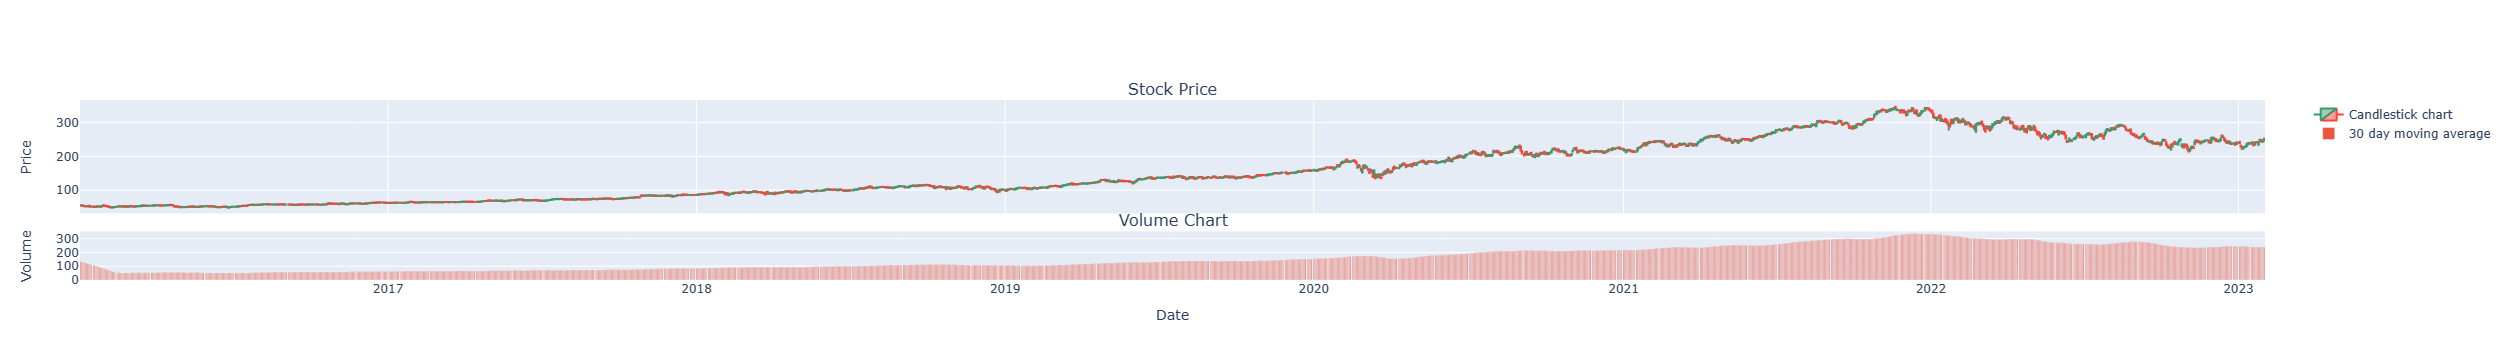

In [19]:
#Create candlestick chart:
def get_candlestick_plot(stock_df):
    fig = make_subplots(
        rows = 2,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ('Stock Price', 'Volume Chart'),
        row_width = [0.3, 0.7]
    )
    fig.add_trace(
        go.Candlestick(
            x = stock_df.index,
            open = stock_df['open'], 
            high = stock_df['high'],
            low = stock_df['low'],
            close = stock_df['close'],
            name = 'Candlestick chart'
        ),
        row = 1,
        col = 1,
    )
    fig.add_trace(
        go.Bar(x = stock_df.index, y = stock_df['30_ma'], name = '30 day moving average'),
        row = 2,
        col = 1,
    )
    fig['layout']['xaxis2']['title'] = 'Date'
    fig['layout']['yaxis']['title'] = 'Price'
    fig['layout']['yaxis2']['title'] = 'Volume'
    fig.update_xaxes(
        rangebreaks = [{'bounds': ['sat', 'mon']}],
        rangeslider_visible = False,
    )
    return fig
get_candlestick_plot(stock1_df)